In [2]:
from sklearn.grid_search import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Paste your dataset

In [3]:
%pylab inline
pd.options.display.max_columns=100
pd.options.display.max_rows=15
#importing Dataset

os.chdir("D:\\analytixlabs\\Complete_datasets")
print os.getcwd() 
Telecom=pd.read_csv("Proactive Attrition Management-Logistic Regression Case Study.csv")

Val_Telecom=Telecom.loc[Telecom.CHURNDEP.isnull()]
TT_Telecom=Telecom.loc[Telecom.CHURNDEP.isin([0,1])]

#removing these 2 columns will give us the base model with any NAs['CALIBRAT' ,'CALLFWDV' ,'CALLWAIT',]
from warnings import WarningMessage,filterwarnings
#removing targrt leaks:
TT_Telecom.drop(labels=['CHURN','RETCALL','RETCALLS','RETACCPT'],inplace=True,axis=1)
#MAILORD is coliner with MAILRES,PHONES-Model,MOUREC-MOU,OWNRENT-CREDITCD,BLCKVCE	DROPBLK,

#removing Other colinear colums
TT_Telecom.drop(labels=['CSA','CALIBRAT' ,'CALLFWDV' ,'CALLWAIT','MODELS','MOUREC','CUSTOMER',
                        'BLCKVCE','DROPBLK','INCMISS','OWNRENT','OVERAGE','UNIQSUBS','AGE2','PEAKVCE','OPEAKVCE','REFURB','TRUCK'
                        ,'RV','MARRYUN','MAILORD','PCOWN','NEWCELLN','MCYCLE','REVENUE','MAILFLAG','CHANGER','OUTCALLS'],inplace=True,axis=1)
TT_Telecom.dropna(subset=['AGE1','CHANGEM'],inplace=True)

#CSA cant be identified so we we will keep them as missing
#TT_Telecom.CSA.fillna('Missing',inplace=True)

X=TT_Telecom.ix[:,:-1]
y=TT_Telecom.CHURNDEP
#X_test=Val_Telecom.ix[:,:-1]
#y_test=Val_Telecom.CHURNDEP

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)


C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Populating the interactive namespace from numpy and matplotlib
D:\analytixlabs\Complete_datasets
(31152, 45)
(7789, 45)
(31152L,)
(7789L,)


In [ ]:
from sklearn.preprocessing import scale
X = scale(X_train)
Xt=scale(X_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]));


In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()

In [8]:
names=X_train.columns.tolist()
print sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), names), 
             reverse=True)
print '---------------------------'
sorted(zip(map(lambda x: round(x, 4), tree.feature_importances_), names), 
             reverse=True)

### ADABOOST

Optimal number of features : 13


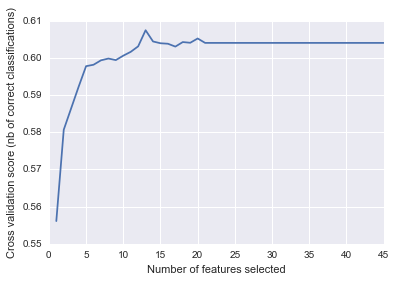

In [3]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Create the RFE object and compute a cross-validated score.
adb = AdaBoostClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=adb, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

BEFORE YOU RUN BELOW PLEASE DEFINE X and Y .. MAKE SURE YOU HAVE DONE ALL FEATURE ENGINREENG and just choosing hyperparameters

# KNN

In [14]:
knn=KNeighborsClassifier()
params = {
    'n_neighbors': [2, 4, 5],
    'p': [2,3],
    
}
knngs = GridSearchCV(knn, params, cv=5, scoring='roc_auc', n_jobs=4)
knngs.fit(X, y_train)

print knngs.best_params_
print knngs.best_estimator_
print knngs.best_score_
print knngs.error_score
print knngs.grid_scores_


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [2, 4, 5], 'p': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [15]:
print knngs.best_params_
print knngs.best_estimator_
print knngs.best_score_
print knngs.error_score
print knngs.grid_scores_


{'n_neighbors': 5, 'p': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.540255631567
raise
[mean: 0.52822, std: 0.00440, params: {'n_neighbors': 2, 'p': 2}, mean: 0.52620, std: 0.00335, params: {'n_neighbors': 2, 'p': 3}, mean: 0.53789, std: 0.00811, params: {'n_neighbors': 4, 'p': 2}, mean: 0.53500, std: 0.00636, params: {'n_neighbors': 4, 'p': 3}, mean: 0.54026, std: 0.01022, params: {'n_neighbors': 5, 'p': 2}, mean: 0.53704, std: 0.00756, params: {'n_neighbors': 5, 'p': 3}]
<function predict_proba at 0x0000000010CADEB8>


## LOGESTIC

In [ ]:
print "Checking Best features with Logestic Regression"
logreg_params={'penalty':['L1','l2'],
               'C': [0.001,0.01,0.1,1,10,100]}

grid_log=GridSearchCV(LogisticRegression(),
                     logreg_params,
                     cv=10,
                     n_jobs=-1).fit(X_Scaled,y)
print grid_log.best_params_
print grid_log.best_estimator_
print grid_log.best_score_
print grid_log.error_score
print grid_log.grid_scores_

In [6]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

svm = SVC(kernel='poly')

params = {
    'C': [0.01, 0.1, 1],
    'degree': [3, 4,6,8],
    
}

gs = GridSearchCV(svm, params, cv=10, scoring='roc_auc', n_jobs=10)
gs.fit(X_train, y_train)





GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=10,
       param_grid={'C': [0.01, 0.1, 1], 'degree': [3, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [ ]:
gs.

In [9]:
y_true, y_pred = y_test, gs.predict(X_test)

print gs.best_params_
print gs.best_estimator_
print gs.best_score_
print gs.error_score
print gs.grid_scores_

{'C': 0.1, 'degree': 3}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.585156401149
raise
[mean: 0.57541, std: 0.00900, params: {'C': 0.01, 'degree': 3}, mean: 0.56898, std: 0.00921, params: {'C': 0.01, 'degree': 4}, mean: 0.56671, std: 0.01208, params: {'C': 0.01, 'degree': 6}, mean: 0.56074, std: 0.01085, params: {'C': 0.01, 'degree': 8}, mean: 0.58516, std: 0.01062, params: {'C': 0.1, 'degree': 3}, mean: 0.57611, std: 0.01089, params: {'C': 0.1, 'degree': 4}, mean: 0.56868, std: 0.01027, params: {'C': 0.1, 'degree': 6}, mean: 0.56307, std: 0.01174, params: {'C': 0.1, 'degree': 8}, mean: 0.58242, std: 0.01190, params: {'C': 1, 'degree': 3}, mean: 0.57425, std: 0.01249, params: {'C': 1, 'degree': 4}, mean: 0.56447, std: 0.01180, params: {'C': 1, 'degree': 6}, mean: 0.55730, std: 0.01164, params: {'C': 1, 'de

## Neural network

In [8]:
import sklearn 
sklearn.__version__

'0.17'

In [ ]:
from sklearn.neural_network import MLPClassifier

MLPClassifier = MLPClassifier(kernel='poly')

params = {
    'C': [0.01, 0.1, 1],
    'degree': [3, 4,6,8],
    
}

gs = GridSearchCV(svm, params, cv=10, scoring='roc_auc', n_jobs=10)
gs.fit(X_train, y_train)


### CLustering



from sklearn.cluster import KMeans,DBSCAN

kmeans = KMeans(n_clusters=2, random_state=42)

labels=kmeans.fit(X_train)
labels

In [15]:
CLUS_T=X_train.copy()
labels.labels_.shape

(31152L,)

In [ ]:
dbs=DBSCAN()
dbs.fit(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='Spectral');

In [30]:
CLUSTERED=X_train
CLUSTERED['cluster']=list(labels.labels_)
CLUSTERED.head()

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [31]:
CLUSTERED.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'